In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('DataNeuron_Text_Similarity.csv')
df

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [4]:
import re
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

STOPWORDS = list(stopwords.words('english'))
ps = PorterStemmer()

class preprocess_text():
    def remove_URL(text):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'',str(text))
    
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    
    def remove_html(text):
        html=re.compile(r'<.*?>')
        return html.sub(r'',text)
    
    def remove_punctuation(text):
        table=str.maketrans('','',string.punctuation)
        return text.translate(table)

    def final_preprocess(text):
        text = text.lower()
        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        text = ' '.join(e for e in text.split() if e.lower() not in STOPWORDS)
        text = ps.stem(text)
        return text
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
cleaned_df = df.copy()

In [6]:
cleaned_df['text1_cleaned'] = cleaned_df['text1'].apply(lambda x: preprocess_text.remove_URL(x))
cleaned_df['text1_cleaned'] = cleaned_df['text1_cleaned'].apply(lambda x: preprocess_text.remove_emoji(x))
cleaned_df['text1_cleaned'] = cleaned_df['text1_cleaned'].apply(lambda x: preprocess_text.remove_punctuation(x))
cleaned_df['text1_cleaned'] = cleaned_df['text1_cleaned'].apply(lambda x: preprocess_text.remove_html(x))
cleaned_df['text1_cleaned'] = cleaned_df['text1_cleaned'].apply(lambda x: preprocess_text.final_preprocess(x))

In [7]:
cleaned_df['text2_cleaned'] = cleaned_df['text2'].apply(lambda x: preprocess_text.remove_URL(x))
cleaned_df['text2_cleaned'] = cleaned_df['text2_cleaned'].apply(lambda x: preprocess_text.remove_emoji(x))
cleaned_df['text2_cleaned'] = cleaned_df['text2_cleaned'].apply(lambda x: preprocess_text.remove_punctuation(x))
cleaned_df['text2_cleaned'] = cleaned_df['text2_cleaned'].apply(lambda x: preprocess_text.remove_html(x))
cleaned_df['text2_cleaned'] = cleaned_df['text2_cleaned'].apply(lambda x: preprocess_text.final_preprocess(x))

In [8]:
cleaned_df

,text1,text2,text1_cleaned,text2_cleaned
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,broadband challenges tv viewing number europea...,gardener wins double glasgow britain jason gar...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,rap boss arrested drug find rap mogul marion s...,amnesty chief laments war failure lack public ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,player burnout worries robinson england coach ...,hanks greeted wintry premiere hollywood star t...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,hearts oak 32 cotonsport hearts oak set ghanai...,redford vision sundance despite sporting cordu...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens victory la amelie mauresmo mari...
...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,uk directors guild nominees named martin scors...,steel firm cut 45 000 jobs mittal steel one wo...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,u2 play grammy awards show irish rock band u2 ...,israel looks us bank chief israel asked us ban...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,pountney handed ban fine northampton coach bud...,india iran gas export deal india signed 40bn 2...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,belle named best scottish band belle sebastian...,mido makes third apology ahmed mido hossam mad...


In [9]:
concat_df = cleaned_df.copy()

In [10]:
concat_df.columns

Index(['text1', 'text2', 'text1_cleaned', 'text2_cleaned'], dtype='object')

In [11]:
def concat(text1, text2):
    return text1+ ' ' +text2

In [12]:
concat_df['concat_sent'] = concat_df.apply(lambda x: concat(x['text1_cleaned'],x['text2_cleaned']), axis=1)

In [13]:
concat_df

,text1,text2,text1_cleaned,text2_cleaned,concat_sent
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,broadband challenges tv viewing number europea...,gardener wins double glasgow britain jason gar...,broadband challenges tv viewing number europea...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,rap boss arrested drug find rap mogul marion s...,amnesty chief laments war failure lack public ...,rap boss arrested drug find rap mogul marion s...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,player burnout worries robinson england coach ...,hanks greeted wintry premiere hollywood star t...,player burnout worries robinson england coach ...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,hearts oak 32 cotonsport hearts oak set ghanai...,redford vision sundance despite sporting cordu...,hearts oak 32 cotonsport hearts oak set ghanai...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens victory la amelie mauresmo mari...,sir paul rocks super bowl crowds sir paul mcca...
...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,uk directors guild nominees named martin scors...,steel firm cut 45 000 jobs mittal steel one wo...,uk directors guild nominees named martin scors...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,u2 play grammy awards show irish rock band u2 ...,israel looks us bank chief israel asked us ban...,u2 play grammy awards show irish rock band u2 ...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,pountney handed ban fine northampton coach bud...,india iran gas export deal india signed 40bn 2...,pountney handed ban fine northampton coach bud...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,belle named best scottish band belle sebastian...,mido makes third apology ahmed mido hossam mad...,belle named best scottish band belle sebastian...


In [14]:
text_cleaned_list = []
for i, row in cleaned_df.iterrows():
    text_cleaned_list.append(row['text1_cleaned'])
    text_cleaned_list.append(row['text2_cleaned'])

In [15]:
len(text_cleaned_list)

6000

## Tf-idf vectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer()
tfidfvectorizer.fit(text_cleaned_list)
tfidf_vectors=tfidfvectorizer.transform(text_cleaned_list)

In [17]:
arr = tfidf_vectors[54].toarray()
arr.shape

(1, 27786)

In [18]:
def compute_similarity(text_A, text_B):
    tfidf = tfidfvectorizer.fit_transform([text_A, text_B])
    return ((tfidf * tfidf.T).toarray())[0,1]

In [19]:
text_A = cleaned_df['text1'][1]
text_B = cleaned_df['text2'][1]
print(text_A, '\n', text_B)

rap boss arrested over drug find rap mogul marion  suge  knight has been arrested for violating his parole after he was allegedly found with marijuana.  he was arrested in barstow  california  on saturday following an alleged traffic offence. he is expected to be transferred to a state prison while a decision is made on whether he should be released. mr knight  founder of death row records  served a 10-month jail term in 2004 for punching a man while on parole for an assault conviction. police said mr knight was stopped on saturday after performing an illegal u-turn and a search of his car allegedly found marijuana.  he is also accused of not having insurance. a 18-year-old woman in the car was arrested for providing false information and having a fake id card. she was later released. it was his second alleged violation  having previously served half of a nine-year sentence for breaking the terms of his parole. mr knight  39  was jailed in october 1996 following his involvement in a fi

In [20]:
text_A = "nuclear body seeks new tech"
text_B = "terror suspects face arrest"

In [21]:
compute_similarity(
    text_A=text_A,
    text_B=text_B
)

0.0

In [22]:
corpus_df = cleaned_df.copy()

In [23]:
corpus_df["text1_length"] = corpus_df['text1_cleaned'].apply(lambda x: len(x))
corpus_df["text2_length"] = corpus_df['text2_cleaned'].apply(lambda x: len(x))

In [24]:
corpus_df.describe()

,text1_length,text2_length
count,3000.000000,3000.000000
mean,1588.324000,1602.664333
std,861.207935,995.043021
min,483.000000,340.000000
25%,1020.000000,1020.000000
50%,1415.000000,1412.000000
75%,1960.000000,1970.000000
max,11731.000000,16238.000000


## Universal Sentence Encoder

In [25]:
!pip3 install tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [26]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [27]:
sentences = text_cleaned_list

In [28]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [29]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))   

In [30]:
sentence_embeddings = model(sentences)

In [31]:
sentence_embeddings

<tf.Tensor: shape=(6000, 512), dtype=float32, numpy=
array([[-0.05266885, -0.05390523, -0.03664007, ..., -0.018355  ,
        -0.05436891, -0.05152677],
       [-0.0459425 , -0.04594268,  0.04576569, ..., -0.04594246,
        -0.04594268, -0.04594268],
       [-0.04311096, -0.05050139,  0.05068841, ..., -0.03396839,
        -0.05082489, -0.02649629],
       ...,
       [-0.05534938, -0.05555461, -0.05432957, ...,  0.03895622,
        -0.0555934 , -0.0555934 ],
       [-0.02564538, -0.05517934, -0.05376229, ...,  0.03088544,
        -0.04077214, -0.03915875],
       [ 0.04807552, -0.00065575, -0.0461446 , ...,  0.04838486,
        -0.0483885 ,  0.04837618]], dtype=float32)>

In [32]:
cleaned_df

,text1,text2,text1_cleaned,text2_cleaned
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,broadband challenges tv viewing number europea...,gardener wins double glasgow britain jason gar...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,rap boss arrested drug find rap mogul marion s...,amnesty chief laments war failure lack public ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,player burnout worries robinson england coach ...,hanks greeted wintry premiere hollywood star t...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,hearts oak 32 cotonsport hearts oak set ghanai...,redford vision sundance despite sporting cordu...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens victory la amelie mauresmo mari...
...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,uk directors guild nominees named martin scors...,steel firm cut 45 000 jobs mittal steel one wo...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,u2 play grammy awards show irish rock band u2 ...,israel looks us bank chief israel asked us ban...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,pountney handed ban fine northampton coach bud...,india iran gas export deal india signed 40bn 2...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,belle named best scottish band belle sebastian...,mido makes third apology ahmed mido hossam mad...


In [ ]:
def embed(sent):
    return model([sent])[0]

In [33]:
query = cleaned_df['text2'][2996]
req_vec = cleaned_df['text2'][2997]
query_vec = embed(query)

In [34]:
cosine(query_vec, embed(req_vec))

0.3982382

## Glove Embedding


In [61]:
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split(' ')
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') ## These are the vectors representing the embedding for the word
    embeddings_index[word] = coefs
f.close()

In [62]:
glove_words =  set(embeddings_index.keys())

In [65]:
def convert_sen_to_vec(sentence):
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sentence.split():
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    return vector

In [67]:
sent1 = cleaned_df['text1'][2995]
sent2 = cleaned_df['text2'][2]

In [68]:
query_vec = convert_sen_to_vec(sent1)
req_vec = convert_sen_to_vec(sent2)

In [69]:
cosine(query_vec, req_vec)

0.9612277051548735

## n-gram TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer_ngram = TfidfVectorizer(ngram_range=(2, 3))
tfidfvectorizer_ngram.fit(text_cleaned_list)
tfidf_vectors=tfidfvectorizer_ngram.transform(text_cleaned_list)

In [43]:
arr = tfidf_vectors[54].toarray()
arr.shape

(1, 544109)

In [51]:
def compute_similarity(text_A, text_B):
    tfidf = tfidfvectorizer.fit_transform([text_A, text_B])
    return ((tfidf * tfidf.T).toarray())[0,1]

In [53]:
def compute_ngram_similarity(text_A, text_B):
    tfidf = tfidfvectorizer_ngram.fit_transform([text_A, text_B])
    return ((tfidf * tfidf.T).toarray())[0,1]

In [45]:
df

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [46]:
text_A = cleaned_df['text2'][2996]
text_B = cleaned_df['text2'][2997]
print(text_A, '\n', text_B)

israel looks to us for bank chief israel has asked a us banker and former international monetary fund director to run its central bank.  stanley fischer  vice chairman of banking giant citigroup  has agreed to take the bank of israel job subject to approval from parliament and cabinet. his nomination by prime minister ariel sharon came as a surprise  and led to gains on the tel aviv stock market. mr fischer  who speaks fluent hebrew  will have to become an israeli citizen to take the job. the us says he will not have to give up us citizenship to do so.  previous incumbent david klein  who often argued with the finance ministry  steps down on 16 january. mr fischer will face a delicate balancing act - both in political and economic terms - between mr sharon and finance minister binyamin netanyahu  who also backed his nomination. but his appointment has also raised hopes that it could bring in fresh investment - and perhaps even an improvement in the country s credit rating mr fischer fi

In [47]:
compute_similarity(
    text_A=text_A,
    text_B=text_B
)

0.005918349931954614

In [87]:
semantically_similar_pairs = {
    'text1': [
        'The cat is on the mat.',
        'The sun sets in the west.',
        'She enjoys reading books.',
        'The car raced down the highway.',
        'He plays the guitar skillfully.',
        'Rainbows are a beautiful natural phenomenon.',
        'The coffee shop is crowded with people.',
        'Learning a new language takes time and effort.'
    ],
    'text2': [
        'A mat is where the cat is sitting.',
        'In the west, the sun goes down.',
        'Reading books is something she finds enjoyable.',
        'The vehicle sped along the freeway.',
        'Playing the guitar is something he does with great skill.',
        'The beauty of rainbows is a natural wonder.',
        'People fill the coffee shop, creating a crowded atmosphere.',
        'It requires both time and effort to learn a new language.'
    ]
}

In [88]:
semantically_dissimilar_pairs = {
    'text1': [
        'The moon orbits the Earth.',
        'Mathematics involves complex calculations.',
        'Water boils at 100 degrees Celsius.',
        'The company announced a new product launch.',
        'Exercise is important for maintaining good health.',
        'Winter often brings snow and cold temperatures.',
        'Shakespeare wrote many famous plays and sonnets.',
        'Cooking requires a combination of ingredients and techniques.'
    ],
    'text2': [
        'Apples are a delicious fruit.',
        'Birds migrate during the changing seasons.',
        'Music is a form of artistic expression.',
        'Elephants are the largest land mammals.',
        'The Eiffel Tower is a famous landmark in Paris.',
        'Computers use binary code to process information.',
        'Ocean currents influence global weather patterns.',
        'The concept of time is a human construct.'
    ]
}

In [89]:
sim_df = pd.DataFrame(semantically_similar_pairs)
sim_df

,text1,text2
0,The cat is on the mat.,A mat is where the cat is sitting.
1,The sun sets in the west.,"In the west, the sun goes down."
2,She enjoys reading books.,Reading books is something she finds enjoyable.
3,The car raced down the highway.,The vehicle sped along the freeway.
4,He plays the guitar skillfully.,Playing the guitar is something he does with g...
5,Rainbows are a beautiful natural phenomenon.,The beauty of rainbows is a natural wonder.
6,The coffee shop is crowded with people.,"People fill the coffee shop, creating a crowde..."
7,Learning a new language takes time and effort.,It requires both time and effort to learn a ne...


In [90]:
dissim_df = pd.DataFrame(semantically_dissimilar_pairs)
dissim_df

,text1,text2
0,The moon orbits the Earth.,Apples are a delicious fruit.
1,Mathematics involves complex calculations.,Birds migrate during the changing seasons.
2,Water boils at 100 degrees Celsius.,Music is a form of artistic expression.
3,The company announced a new product launch.,Elephants are the largest land mammals.
4,Exercise is important for maintaining good hea...,The Eiffel Tower is a famous landmark in Paris.
5,Winter often brings snow and cold temperatures.,Computers use binary code to process information.
6,Shakespeare wrote many famous plays and sonnets.,Ocean currents influence global weather patterns.
7,Cooking requires a combination of ingredients ...,The concept of time is a human construct.


In [99]:
text1 = sim_df['text1'][0]
text2 = sim_df['text2'][0]
print(text1, '\n', text2)
compute_similarity(text1, text2)

The cat is on the mat. 
 A mat is where the cat is sitting.


0.6052095209431789

In [128]:
cum_sim_score = 0
for i, row in sim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    sim_score = compute_similarity(text1, text2)
    cum_sim_score += sim_score
avg_tfidf_sim_score = np.round(cum_sim_score/sim_df.shape[0]*100, 2)

In [129]:
avg_tfidf_sim_score

43.46

In [150]:
cum_dissim_score = 0
for i, row in dissim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    dissim_score = compute_similarity(text1, text2)
    cum_dissim_score += dissim_score
avg_tfidf_dissim_score = np.round(cum_dissim_score/dissim_df.shape[0]*100, 2)

In [151]:
avg_tfidf_dissim_score

3.03

In [132]:
cum_sim_score = 0
for i, row in sim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    sim_score = compute_ngram_similarity(text1, text2)
    cum_sim_score += sim_score
avg_tfidf_ngram_sim_score = np.round(cum_sim_score/sim_df.shape[0]*100, 2)

In [133]:
avg_tfidf_ngram_sim_score

10.94

In [152]:
cum_dissim_score = 0
for i, row in dissim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    dissim_score = compute_ngram_similarity(text1, text2)
    cum_dissim_score += dissim_score
avg_tfidf_ngram_dissim_score = np.round(cum_dissim_score/dissim_df.shape[0]*100, 2)

In [153]:
avg_tfidf_ngram_dissim_score

0.0

In [136]:
cum_sim_score = 0
for i, row in sim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    use_emb1 = model([text1])[0]
    use_emb2 = model([text2])[0]
    sim_score = cosine(use_emb1, use_emb2)
    cum_sim_score += sim_score
avg_use_sim_score = np.round(cum_sim_score/sim_df.shape[0]*100, 2)

In [137]:
avg_use_sim_score

74.8

In [154]:
cum_dissim_score = 0
for i, row in dissim_df.iterrows():
    text1 = row['text1']
    text2 = row['text2']
    use_emb1 = model([text1])[0]
    use_emb2 = model([text2])[0]
    dissim_score = cosine(use_emb1, use_emb2)
    cum_dissim_score += dissim_score
avg_use_dissim_score = np.round(cum_dissim_score/dissim_df.shape[0]*100, 2)

In [155]:
avg_use_dissim_score

8.09

In [140]:
cum_sim_score = 0
for i, row in sim_df.iterrows():
    try:
        text1 = row['text1']
        text2 = row['text2']
        use_emb1 = convert_sen_to_vec(text1)
        use_emb2 = convert_sen_to_vec(text2)
        sim_score = cosine(use_emb1, use_emb2)
        cum_sim_score += sim_score
    except:
        continue
    avg_glove_sim_score = np.round(cum_sim_score/sim_df.shape[0]*100, 2)

In [141]:
avg_glove_sim_score

79.34

In [156]:
cum_dissim_score = 0
for i, row in dissim_df.iterrows():
    try:
        text1 = row['text1']
        text2 = row['text2']
        use_emb1 = convert_sen_to_vec(text1)
        use_emb2 = convert_sen_to_vec(text2)
        dissim_score = cosine(use_emb1, use_emb2)
        cum_dissim_score += dissim_score
    except:
        continue
    avg_glove_dissim_score = np.round(cum_dissim_score/dissim_df.shape[0]*100, 2)

In [157]:
avg_glove_dissim_score

57.83

In [158]:
categories = ['tfidf', 'n_gram_tfidf', 'glove', 'USE']
sim_values = [avg_tfidf_sim_score, avg_tfidf_ngram_sim_score, avg_use_sim_score, avg_glove_sim_score]
dissim_values = [avg_tfidf_dissim_score, avg_tfidf_ngram_dissim_score, avg_use_dissim_score, avg_glove_dissim_score]

In [159]:
compare_df = pd.DataFrame(
    {
        'sim_values': sim_values,
        'dissim_values': dissim_values
    }, 
    index = categories
)
compare_df

,sim_values,dissim_values
tfidf,43.46,3.03
n_gram_tfidf,10.94,0.00
glove,74.80,8.09
USE,79.34,57.83


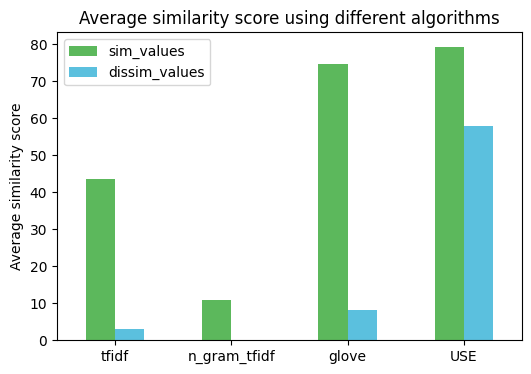

In [171]:
colors = ['#5cb85c', '#5bc0de']

ax = compare_df.plot(kind='bar', color=colors, figsize=(6, 4), rot=0, ylabel='Average similarity score', title="Average similarity score using different algorithms")

for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='edge')